In [1]:
#%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Prédisez la demande en electricité

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Import des datasets

## Consommation électrique

In [3]:
df = pd.read_csv('df_mens2.csv', encoding='utf8', sep=';', parse_dates=[0])

In [4]:
df['Mois'] = pd.to_datetime(df['Mois'], format="%Y/%m")

In [5]:
df = df.set_index('Mois') # Transformation du dataset en timeseries

In [6]:
df.head()

,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
Mois,,,,,,,,,,,,,,,,,,,,,
2012-01-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
2012-02-01,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2012-03-01,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
2012-04-01,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
2012-05-01,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,974,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1195 entries, 2012-01-01 to 2020-07-01
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Qualité                                   1195 non-null   object 
 1   Territoire                                1195 non-null   object 
 2   Production totale                         1195 non-null   int64  
 3   Production nucléaire                      740 non-null    float64
 4   Production thermique totale               1195 non-null   int64  
 5   Production thermique charbon              801 non-null    float64
 6   Production thermique fioul                1195 non-null   int64  
 7   Production thermique gaz                  1195 non-null   int64  
 8   Production hydraulique                    1195 non-null   int64  
 9   Production éolien                         1195 non-null   int64  
 10  Production solaire

In [8]:
df = df[['Territoire', 'Consommation totale']] # Sélection de deux variables

In [9]:
df = df[df['Territoire'] == 'France'] # Restriction des données à la France

## DJU

In [10]:
dju = pd.read_csv('calcul_DJU_2.csv', encoding='utf8', sep=';')

In [11]:
dju 

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2020,339,"249,6","268,6","81,4","65,7","20,6",0,0,0,0,0,0,"1024,9"
1,2019,"404,9","268,3","233,1","168,5","117,9","24,4",0,"1,7","26,7","133,7","282,6","327,3",1989
2,2018,"303,4","432,6","314,3","119,7","55,9","8,1",0,"3,3","34,3","122,4","282,5","325,9","2002,2"
3,2017,"467,9","278,4","206,1","182,6",75,"9,4",1,"6,8","62,6","99,4","282,6",369,"2040,6"
4,2016,"364,4","321,6","321,1","212,1","88,1","27,5","5,7","3,2","11,7",176,"285,6","390,8","2207,3"
5,2015,392,"365,7","275,5","141,1","91,5","15,8","6,9","6,1","71,9","176,9",195,"248,1","1986,2"
6,2014,"324,4","281,9","223,9","135,5","100,2","19,1","8,3","19,3",16,"92,3","222,6","368,2","1811,5"
7,2013,"429,2","402,2","376,6","209,5","158,4","43,6","0,6",5,"41,5",105,"303,9","349,5","2424,8"
8,2012,336,"435,9","201,9","230,3","83,3",35,"12,4","2,4",58,"154,6","296,2","345,9","2191,5"
9,2011,392,"304,8","243,1","77,6","43,4","31,4",15,"11,9","23,2","127,6","226,6","312,7",1809


In [12]:
dju.columns

Index(['Unnamed: 0', 'JAN', 'FÉV', 'MAR', 'AVR', 'MAI', 'JUN', 'JUI', 'AOÛ',
       'SEP', 'OCT', 'NOV', 'DÉC', 'Total'],
      dtype='object')

In [13]:
dju.columns = ['year', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'TOTAL']

In [14]:
list_count = list(dju.columns[1:-1])

In [15]:
dju = dju.melt(id_vars='year', value_vars=list_count) # Transformation du dataset en réduisant le nombre de colonnes

In [16]:
dju.head()

,year,variable,value
0,2020,JAN,339
1,2019,JAN,"404,9"
2,2018,JAN,"303,4"
3,2017,JAN,"467,9"
4,2016,JAN,"364,4"
...,...,...,...
139,2013,DEC,"349,5"
140,2012,DEC,"345,9"
141,2011,DEC,"312,7"
142,2010,DEC,512


In [17]:
# Création de l'index
dju['date'] = pd.to_datetime(dju['year'].astype(str) + '-' + dju['variable']) 
dju.set_index('date', inplace=True)

In [19]:
dju= dju[['value']]

In [20]:
dju.columns = ['DJU']
dju = dju.copy()

In [21]:
dju.loc[:,'DJU'] = dju.loc[:,'DJU'].replace(',', '.') # Nettoyage

In [22]:
dju.loc[:,'DJU'] = dju.loc[:,'DJU'].str.replace(',', '.') # Nettoyage

In [23]:
dju['DJU'] = dju['DJU'].astype('float') # Nettoyage

In [24]:
dju.info() # Contrôle

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2020-01-01 to 2009-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJU     144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [95]:
dju.head()

,DJU
date,
2020-01-01,339.0
2019-01-01,404.9
2018-01-01,303.4
2017-01-01,467.9
2016-01-01,364.4


In [26]:
# Restriction
dju = dju['01-2009' : '07-2020']

,DJU
date,
2020-01-01,339.0
2019-01-01,404.9
2018-01-01,303.4
2017-01-01,467.9
2016-01-01,364.4
...,...
2013-12-01,349.5
2012-12-01,345.9
2011-12-01,312.7


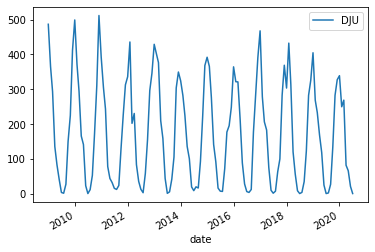

In [27]:
dju.plot()
plt.savefig('dju_avant_merge.jpg')

In [28]:
df = df.join(dju)

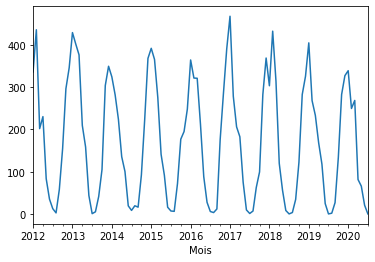

In [29]:
# Contrôle
df['DJU'].plot()
plt.savefig('dju_apres_merge.jpg')

In [30]:
df.head()

,Territoire,Consommation totale,DJU
Mois,,,
2012-01-01,France,51086,336.0
2012-02-01,France,54476,435.9
2012-03-01,France,43156,201.9
2012-04-01,France,40176,230.3
2012-05-01,France,35257,83.3


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2012-01-01 to 2020-07-01
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Territoire           103 non-null    object 
 1   Consommation totale  103 non-null    int64  
 2   DJU                  103 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.2+ KB


In [32]:
df.describe()

,Consommation totale,DJU
count,103.000000,103.000000
mean,39834.961165,171.651456
std,7133.961625,141.420790
min,30727.000000,0.000000
25%,33447.500000,27.100000
50%,37063.000000,154.600000
75%,45135.000000,290.900000
max,57406.000000,467.900000


In [33]:
# Contrôle
df['2020'] 

,Territoire,Consommation totale,DJU
Mois,,,
2020-01-01,France,49755,339.0
2020-02-01,France,43409,249.6
2020-03-01,France,41564,268.6
2020-04-01,France,30744,81.4
2020-05-01,France,30727,65.7
2020-06-01,France,30842,20.6
2020-07-01,France,33004,0.0


## Regression linéaire

In [34]:
df['conso_tot'] = df['Consommation totale'] # On renomme la variable

In [35]:
df = df[['Territoire', 'DJU', 'conso_tot']]

In [36]:
df1 = df.copy()

In [37]:
df1 = df1['2012-01' : '2020-06']

In [38]:
import statsmodels.formula.api as smf

In [39]:
reg = smf.ols(formula='conso_tot ~ DJU', data= df1).fit() # Création du modèle

In [40]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              conso_tot   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1765.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           2.40e-65
Time:                        13:05:20   Log-Likelihood:                -900.06
No. Observations:                 102   AIC:                             1804.
Df Residuals:                     100   BIC:                             1809.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.137e+04    261.284    120.068      0.000    3.09e+04    3.19e+04
DJU           49.2107      1.171     42.010      0.000      46.887      51.535
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.099
Skew:                          -0.065   Prob(JB):                        0.952
Kurtosis:                       2.921   Cond. No.                         354.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analyse des résultats

In [41]:
alpha = 0.05

In [42]:
n = df1.shape[0]

In [43]:
p = 2

In [44]:
analyses = pd.DataFrame({'obs':np.arange(0, n)})

### Calcul des leviers

In [45]:
analyses['levier'] = reg.get_influence().hat_matrix_diag
seuil_levier = 2*p/n

In [46]:
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Calcul des résidus studentisés

In [47]:
analyses['rstudent'] = reg.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

### Détermination de la distance de cook

In [48]:
influence = reg.get_influence().cooks_distance[0]

In [49]:
analyses['dcooks'] = influence
seuil_dcook = 4/(n-p)

### Vérification de la colinéarité des variables

In [50]:
variables = reg.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0]

In [51]:
import statsmodels
import statsmodels.stats.diagnostic

### Test de l'homoscédasticité

In [52]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.998185599393704


In [53]:
obs_a_retirer = analyses[(analyses.levier > seuil_levier) & (analyses.rstudent > seuil_rstudent) & (analyses.dcooks > seuil_dcook)]
obs_a_retirer

,obs,levier,rstudent,dcooks


# Extraction des résidus

In [54]:
df1['resid'] = reg.resid

In [55]:
df1['resid'] # Aperçu

Mois
2012-01-01    3179.169255
2012-02-01    1653.015975
2012-03-01    1848.329966
2012-04-01   -2529.255151
2012-05-01    -214.275849
                 ...     
2020-02-01    -246.022502
2020-03-01   -3026.026629
2020-04-01   -4633.775436
2020-05-01   -3878.166762
2020-06-01   -1543.762228
Name: resid, Length: 102, dtype: float64

In [58]:
df1.loc[:,'prev_dju'] = reg.params[1] * df1.loc[:,'DJU'] + reg.params[0] # Création de l'équation Y = AX + b

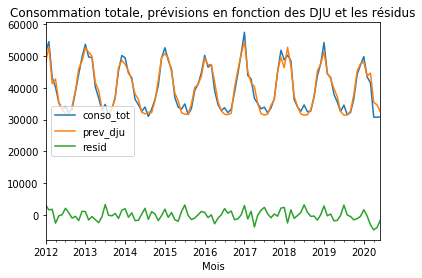

In [59]:
df1['conso_tot'].plot()
df1['prev_dju'].plot()
df1['resid'].plot()
plt.title('Consommation totale, prévisions en fonction des DJU et les résidus')
plt.legend()
plt.savefig('consot_tot-dju-resid.jpg')
plt.show()

## Box-Jenkins method

### Identification

In [60]:
x = df1['resid']

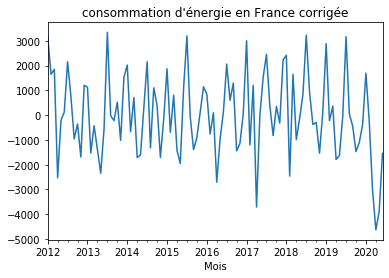

In [61]:
x.plot(title='''consommation d'énergie en France corrigée''')
plt.savefig('conso_elect_france')
plt.show()

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

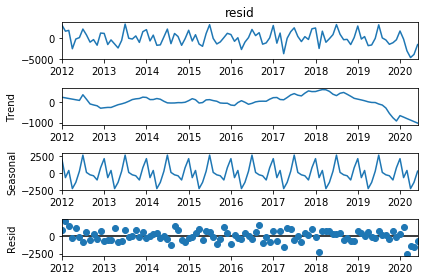

In [63]:
seas_dec = seasonal_decompose(x, period=12, extrapolate_trend='freq')
seas_dec.plot()
plt.savefig('desaisonnalisation.jpg')
plt.show()

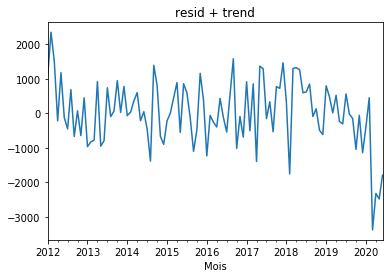

In [64]:
# Représentation graphique de la série temporelle sans la saisonnalité
seas = seas_dec.resid + seas_dec.trend
seas.plot().set_title('resid + trend')
plt.savefig('resid-trend.jpg')
plt.show()

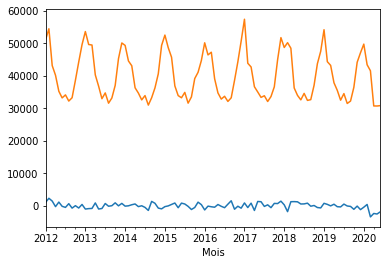

In [65]:
seas.plot()
df1['conso_tot'].plot()
plt.savefig('conso_tot-resid-trend.jpg')
plt.show()

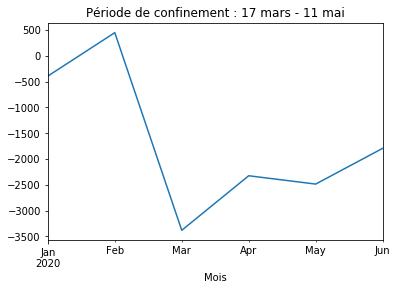

In [66]:
# Focus sur la période du confinement

seas['2020'].plot()
plt.title('Période de confinement : 17 mars - 11 mai')
plt.savefig('focus_confinement.jpg')
plt.show()

In [67]:
from statsmodels.tsa.stattools import adfuller

In [68]:
# Augmented Dicky Fuller avec les données brutes
print(adfuller(x))

# Augmented Dicky Fuller : diff de 1
x_1 = x.diff(12).dropna()
print(adfuller(x_1))

# Augmented Dicky Fuller : diff de 12
x_1_bis = x.diff(1).dropna()
print(adfuller(x_1_bis))

# Augmented Dicky Fuller : diff de 1 + diff de 12
x_2 = x.diff(1).diff(12).dropna()
print(adfuller(x_2))

(-0.5285821035308392, 0.8863171794747029, 11, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, 1504.4600454305278)
(-0.6111219979601734, 0.8684490547789732, 11, 78, {'1%': -3.517113604831504, '5%': -2.8993754262546574, '10%': -2.5869547797501644}, 1315.183032808974)
(-4.728753240598065, 7.428668585708941e-05, 10, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, 1486.427471169915)
(-3.1137072793599603, 0.025555278892650614, 10, 78, {'1%': -3.517113604831504, '5%': -2.8993754262546574, '10%': -2.5869547797501644}, 1297.8492767450532)


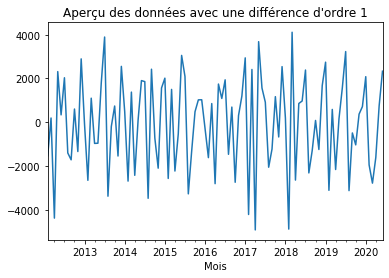

In [69]:
x_1_bis.plot()
plt.title('''Aperçu des données avec une différence d'ordre 1''')
plt.savefig('serie_temp_diff1.jpg')
plt.show()

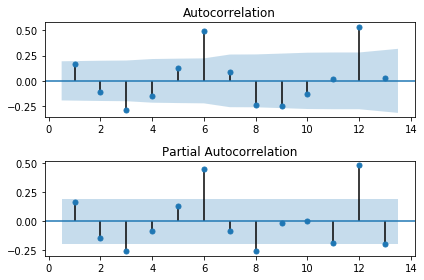

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1,ax2) = plt.subplots(2,1)
plot_acf(x, lags=13, zero=False, ax= ax1)
plot_pacf(x, lags=13, zero=False, ax= ax2)
plt.tight_layout()
plt.savefig('ACF-PACF.jpg')
plt.show()

In [71]:
lags_seasonal = [12,24,36,48,60,72]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


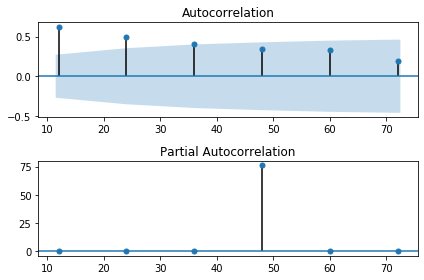

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1,ax2) = plt.subplots(2,1)
plot_acf(x_1_bis, lags=lags_seasonal, ax= ax1)
plot_pacf(x_1_bis, lags=lags_seasonal, ax= ax2)
plt.tight_layout()
plt.savefig('ACF-PACF_saison.jpg')
plt.show()

In [73]:
x.index = pd.DatetimeIndex(x.index.values, freq=x.index.inferred_freq)

In [75]:
#import pmdarima as pm
#results = pm.auto_arima(x, d=1, start_p=1, start_q=1, max_p=2, max_q=2, seasonal=True, m=12, D=1, start_P=1, start_Q=1, max_P=2, max_Q=2, trace=True, error_action= 'warn', stepwise=True, information_criterion='aic')
#results.summary()

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
# Création de la boucle pour déterminer les ordres des paramètres

%%time
order_aic_bic =[]
for p in range(3):
    for q in range(3):
        for P in range(3):
            for Q in range(3):
                try :
                    model = SARIMAX(x, order=(p,1,q), seasonal_order=(P,0,Q,12))
                    results = model.fit()
                    order_aic_bic.append((p, q, P, Q, results.aic, results.bic))
                
                except :
                    pass

order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'P', 'Q', 'aic', 'bic'])
order_df.sort_values('aic')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihoo

Wall time: 47.6 s


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,p,q,P,Q,aic,bic
13,0,1,1,1,1713.632915,1724.093397
39,1,1,1,1,1715.699175,1728.774778
16,0,1,2,1,1715.972758,1729.048361
65,2,1,1,1,1716.081328,1731.772051
40,1,1,1,2,1717.639268,1733.329991
...,...,...,...,...,...,...
28,1,0,0,1,1794.361942,1802.207303
1,0,0,0,1,1802.394171,1807.624412
52,2,0,0,0,1820.405354,1828.250716
27,1,0,0,0,1822.970089,1828.200330


In [78]:
# Création du modèle avec les valeurs trouvées

model = SARIMAX(x, order=(0,1,1), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              resid   No. Observations:                  102
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -852.816
Date:                            Tue, 29 Sep 2020   AIC                           1713.633
Time:                                    13:06:12   BIC                           1724.093
Sample:                                01-01-2012   HQIC                          1717.868
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8178      0.068    -12.076      0.000      -0.951      -0.685
ar.S.L12       0.9995      0.004    269.677      0.000       0.992       1.007
ma.S.L12      -0.9533      0.159     -5.990      0.000      -1.265      -0.641
sigma2      9.359e+05   1.98e-07   4.72e+12      0.000    9.36e+05    9.36e+05
===================================================================================
Ljung-Box (Q):                       38.38   Jarque-Bera (JB):                 4.38
Prob(Q):                              0.54   Prob(JB):                         0.11
Heteroskedasticity (H):               1.17   Skew:                            -0.42
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.75e+27. Standard errors may be unstable.
"""

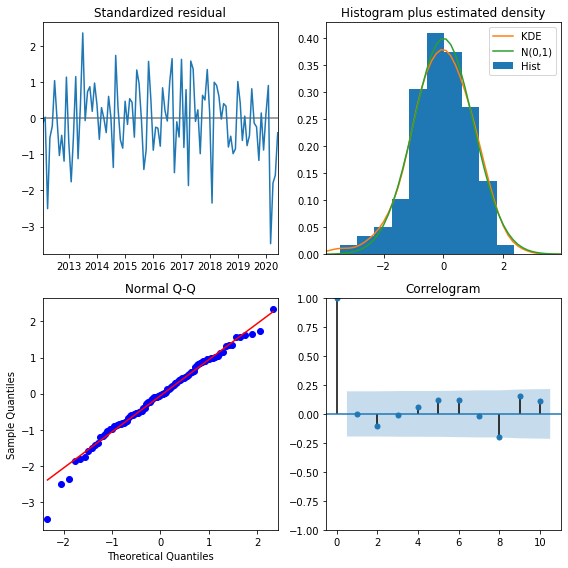

In [79]:
# Diagnostic

results.plot_diagnostics(figsize=(8,8))
plt.tight_layout()
plt.savefig('SARIMAX_diag.jpg')
plt.show()

In [80]:
results.resid

2012-01-01    3179.169255
2012-02-01    -247.151508
2012-03-01      44.452193
2012-04-01   -4346.503344
2012-05-01    -925.407218
                 ...     
2020-02-01     904.150060
2020-03-01   -3482.548368
2020-04-01   -1798.254957
2020-05-01   -1585.368913
2020-06-01    -408.058792
Freq: MS, Length: 102, dtype: float64

In [81]:
mae = np.mean(np.abs(results.resid))
mae

909.3252323754505

## Prédictions

### SARIMAX

In [82]:
# Prévisions sur les derniers 25 mois
mean_pred = results.get_prediction(start=-25).predicted_mean

In [83]:
# Prédiction sur les douze prochains mois
forecast = results.get_forecast(steps=12, dynamic=True)
mean_for = forecast.predicted_mean

In [84]:
# Intervalle de confiance
confidence_intervals = forecast.conf_int()

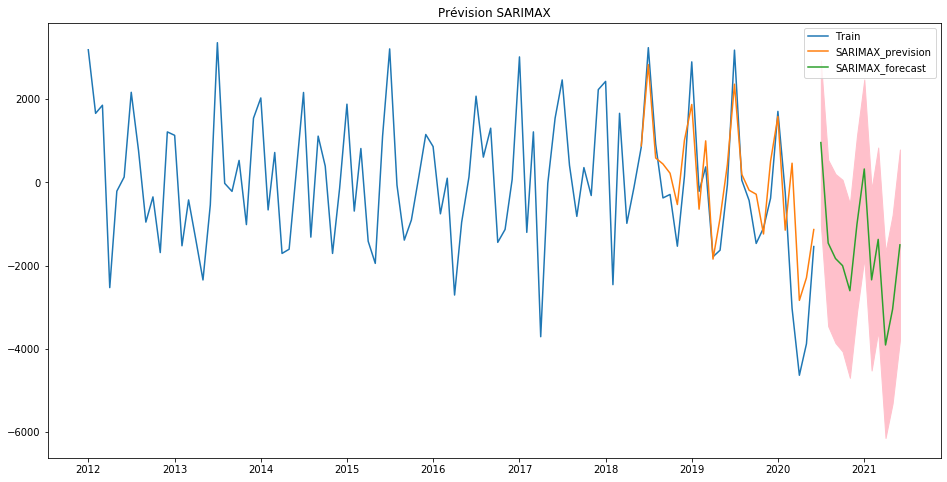

In [85]:
plt.figure(figsize=(16,8))
plt.plot(x.index, x, label='Train')
plt.plot(mean_pred.index, mean_pred, label='SARIMAX_prevision')
plt.plot(mean_for.index, mean_for, label='SARIMAX_forecast')
plt.fill_between(mean_for.index, confidence_intervals['lower resid'], confidence_intervals['upper resid'], color='pink')
plt.title('Prévision SARIMAX')
plt.legend(loc='best')
plt.savefig('SARIMAX.jpg')
plt.show()

## Holt-winters

In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp = ExponentialSmoothing(np.asarray(x), seasonal_periods=12, trend='add', seasonal='add') # Paramètres du modèle tendance et saisonnalité de type additive

In [87]:
mod = exp.fit().forecast(steps=12)

# Prédiction sur les douze prochains mois

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [88]:
index_holt = pd.date_range(start='2020-07-01', periods=12, freq='MS')

In [89]:
holt_df = pd.DataFrame({'index' : index_holt, 'valeur': mod})

In [90]:
holt_df = holt_df.set_index('index')

In [96]:
holt_df.head()

,valeur
index,
2020-07-01,1294.083827
2020-08-01,-1388.807125
2020-09-01,-2150.173456
2020-10-01,-2608.221778
2020-11-01,-3073.741764


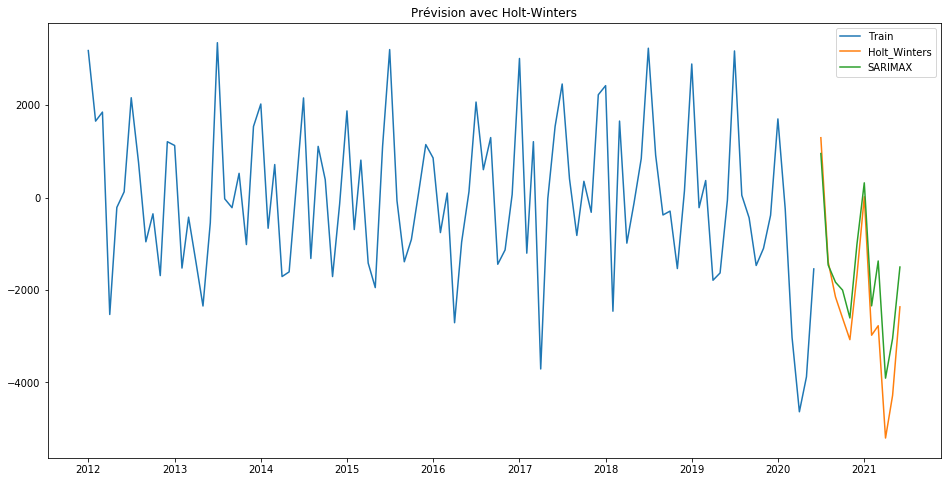

In [93]:
plt.figure(figsize=(16,8))
plt.plot(x.index, x, label='Train')
plt.plot(holt_df.index, holt_df, label='Holt_Winters')
plt.plot(mean_for.index, mean_for, label='SARIMAX')
plt.title('Prévision avec Holt-Winters')
plt.legend(loc='best')
plt.savefig('Holt_Winters.jpg')
plt.show()